In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()

C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

## Data Preparation

<div>
    In our dataset, there are 38 columns out of which only a few is needed. So, we will create another dataframe with only the relevant columns.
</div>

In [4]:
new = df[['SEVERITYCODE', 'COLLISIONTYPE', 'VEHCOUNT' , 'INATTENTIONIND' , 'UNDERINFL', 'WEATHER' , 'ROADCOND' , 'LIGHTCOND' , 'SPEEDING']].copy()
new.head()

,SEVERITYCODE,COLLISIONTYPE,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Angles,2,NaN,N,Overcast,Wet,Daylight,NaN
1,1,Sideswipe,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Parked Car,3,NaN,0,Overcast,Dry,Daylight,NaN
3,1,Other,3,NaN,N,Clear,Dry,Daylight,NaN
4,2,Angles,2,NaN,0,Raining,Wet,Daylight,NaN


<div>
The columns INATTENTIONIND , UNDERINFL , SPEEDING have very variable values. We will now convert them into a formattable form.
</div>

In [6]:
new['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [7]:
new['INATTENTIONIND'] = new['INATTENTIONIND'].replace('Y' , 1)
new['INATTENTIONIND'].value_counts()

1.0    29805
Name: INATTENTIONIND, dtype: int64

In [8]:
new['INATTENTIONIND']= new['INATTENTIONIND'].replace(np.nan, 0)
new['INATTENTIONIND'].value_counts()

0.0    164868
1.0     29805
Name: INATTENTIONIND, dtype: int64

In [9]:
new['INATTENTIONIND'] = new['INATTENTIONIND'].astype(int)
new['INATTENTIONIND'].value_counts()

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64

In [10]:
new['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [11]:
new['UNDERINFL'] = new['UNDERINFL'].replace('Y' , 1)
new['UNDERINFL'] = new['UNDERINFL'].replace('N' , 0)
new['UNDERINFL'].value_counts()

0    100274
0     80394
1      5126
1      3995
Name: UNDERINFL, dtype: int64

In [12]:
new['UNDERINFL'] = pd.to_numeric(new['UNDERINFL'], errors='coerce')
new = new.dropna(subset=['UNDERINFL'])
new['UNDERINFL'] = new['UNDERINFL'].astype(int)
new['UNDERINFL'].value_counts()

0    180668
1      9121
Name: UNDERINFL, dtype: int64

In [13]:
new['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [14]:
new['SPEEDING'] = new['SPEEDING'].replace('Y' , 1)
new['SPEEDING']= new['SPEEDING'].replace(np.nan, 0)
new['SPEEDING'].value_counts()

0.0    180456
1.0      9333
Name: SPEEDING, dtype: int64

In [15]:
new['SPEEDING'] = new['SPEEDING'].astype(int)
new['SPEEDING'].value_counts()

0    180456
1      9333
Name: SPEEDING, dtype: int64

In [16]:
new.head()

,SEVERITYCODE,COLLISIONTYPE,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Angles,2,0,0,Overcast,Wet,Daylight,0
1,1,Sideswipe,2,0,0,Raining,Wet,Dark - Street Lights On,0
2,1,Parked Car,3,0,0,Overcast,Dry,Daylight,0
3,1,Other,3,0,0,Clear,Dry,Daylight,0
4,2,Angles,2,0,0,Raining,Wet,Daylight,0


## Data Visualization

<div>
We will plot bar graphs for each attribute to check their contribution in the collision.
</div>

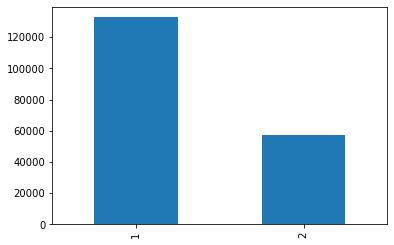

In [17]:
new['SEVERITYCODE'].value_counts().plot(kind= 'bar')

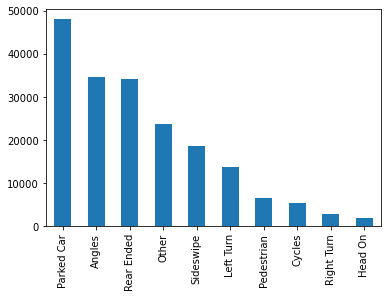

In [18]:
new['COLLISIONTYPE'].value_counts().plot(kind= 'bar')

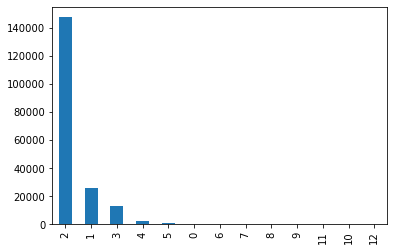

In [19]:
new['VEHCOUNT'].value_counts().plot(kind= 'bar')

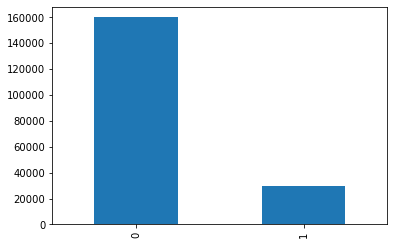

In [20]:
new['INATTENTIONIND'].value_counts().plot(kind= 'bar')

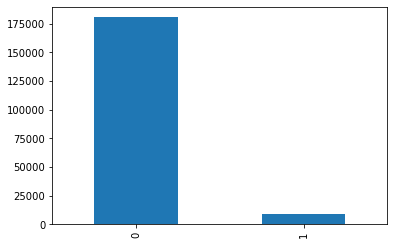

In [21]:
new['UNDERINFL'].value_counts().plot(kind= 'bar')

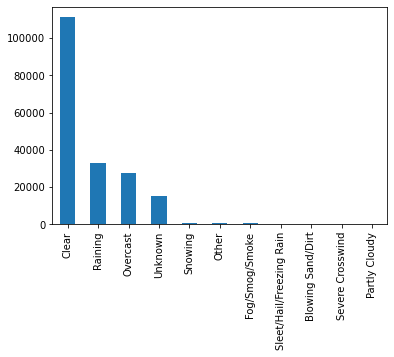

In [22]:
new['WEATHER'].value_counts().plot(kind= 'bar')

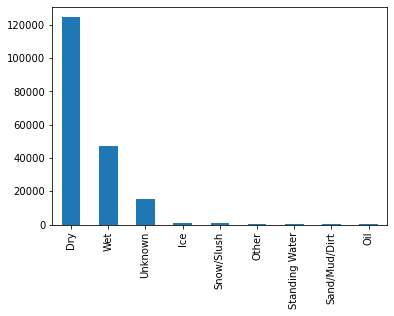

In [23]:
new['ROADCOND'].value_counts().plot(kind= 'bar')

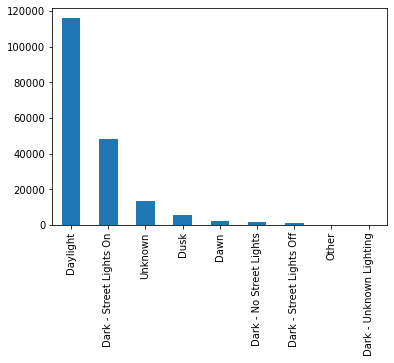

In [24]:
new['LIGHTCOND'].value_counts().plot(kind= 'bar')

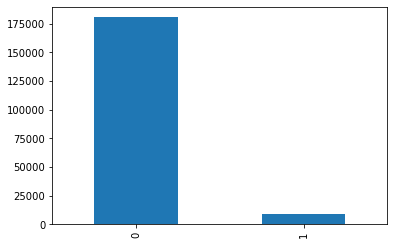

In [25]:
new['SPEEDING'].value_counts().plot(kind= 'bar')

<div>
From the above graphs, we can see that there are a few of the columns that do not play a big role in collision.<br>
Like INATTENTIONIND, UNDERINFL, SPEEDING have 0 occuring significantly more than 1 to the point that 1 can be neglected.
So, for the final dataframe we will drop these columns.
</div>

<div>
We can conclude from the graphs that most collisions happened in clear, dry, and bright conditions, Where the driver was not inattentive or under the influence or speeding. Moreover, most of the crashes are not multi-car collisions.
</div>

In [26]:
final = new[['SEVERITYCODE', 'WEATHER' , 'ROADCOND' , 'LIGHTCOND']].copy()
final.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [27]:
final.dtypes

SEVERITYCODE     int64
WEATHER         object
ROADCOND        object
LIGHTCOND       object
dtype: object

## Label Encoding Data

<div>
In the final dataframe, Most of the columns are of type object, when we need it to be numerical. Therefore the dataframe in this form is not suitable for analysis.<br>
To make it suitable for analysis, we will label encode the dataframe.
</div>

In [35]:
final['WEATHER'].unique()

array(['Overcast', 'Raining', 'Clear', 'Unknown', 'Other', 'Snowing', nan,
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

In [36]:
final['ROADCOND'].unique()

array(['Wet', 'Dry', 'Unknown', nan, 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [37]:
final['LIGHTCOND'].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off', 'Other',
       'Dark - Unknown Lighting', nan], dtype=object)

In [38]:
from sklearn import preprocessing 

In [39]:
label_encoder = preprocessing.LabelEncoder()

In [40]:
final['WEATHER'] = final['WEATHER'].astype(str)
final['WEATHER']= label_encoder.fit_transform(final['WEATHER']) 
final['WEATHER'].unique()

array([ 4,  6,  1, 10,  3,  9, 11,  2,  8,  0,  7,  5])

In [41]:
final['ROADCOND'] = final['ROADCOND'].astype(str)
final['ROADCOND']= label_encoder.fit_transform(final['ROADCOND']) 
final['ROADCOND'].unique()

array([8, 0, 7, 9, 5, 1, 3, 4, 6, 2])

In [42]:
final['LIGHTCOND'] = final['LIGHTCOND'].astype(str)
final['LIGHTCOND']= label_encoder.fit_transform(final['LIGHTCOND']) 
final['LIGHTCOND'].unique()

array([5, 2, 0, 8, 6, 4, 1, 7, 3, 9])

In [43]:
final.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,4,8,5
1,1,6,8,2
2,1,4,0,5
3,1,1,0,5
4,2,6,8,5


## Data Pre-Processing

<div>
We will now divide the dataframe into training and testing sets.<br>
For that the Pandas dataframe needs to be converted into Numpy array. And the we need to create separate training and testin datasets.
</div>

In [44]:
X = np.asarray(final[['WEATHER' , 'ROADCOND' , 'LIGHTCOND']])
X[0:5]

array([[4, 8, 5],
       [6, 8, 2],
       [4, 0, 5],
       [1, 0, 5],
       [6, 8, 5]])

In [45]:
y = np.asarray(final['SEVERITYCODE'])
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

#### Normalizing Data

In [46]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.31689152,  1.47683106,  0.34456298],
       [ 1.01493669,  1.47683106, -1.3978746 ],
       [ 0.31689152, -0.71273666,  0.34456298],
       [-0.73017623, -0.71273666,  0.34456298],
       [ 1.01493669,  1.47683106,  0.34456298]])

#### Train/Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132852, 3) (132852,)
Test set: (56937, 3) (56937,)


# Methodology

### K nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.45267576, 0.56381615, 0.53952614, 0.56694241, 0.56509827,
       0.69571632, 0.6951016 , 0.69652423, 0.69504891])

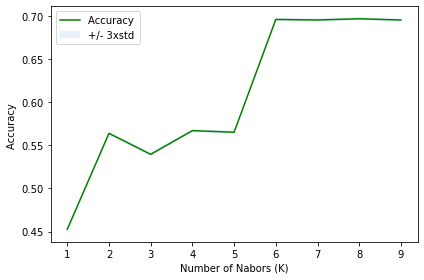

In [50]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [51]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6965242285332912 with k= 8


In [52]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

Kyhat = neigh.predict(X_test)
Kyhat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dataTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
dataTree
dataTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [54]:
predTree = dataTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[1 1 1 1 1]


### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=6, solver='liblinear')

In [56]:
LRyhat = LR.predict(X_test)
LRyhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [57]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.64400001, 0.35599999],
       [0.67376341, 0.32623659],
       [0.68200501, 0.31799499],
       ...,
       [0.67376341, 0.32623659],
       [0.67376341, 0.32623659],
       [0.67376341, 0.32623659]])

# Evaluation

In [58]:
from sklearn.metrics import jaccard_score

In [59]:
from sklearn.metrics import f1_score

In [60]:
from sklearn.metrics import log_loss

### K Nearest Neighbors

In [61]:
#Jaccard Similarity Score
jaccard_score(y_test,Kyhat)

0.6953309588461403

In [62]:
#F1 Score
f1_score(y_test, Kyhat, average='macro')

0.42272577143247686

### Decision Tree

In [63]:
#Jaccard Similarity Score
jaccard_score(y_test,predTree)

0.6999209625010977

In [64]:
#F1 Score
f1_score(y_test, predTree, average='macro')

0.4118543903448288

### Logistic Regression

In [65]:
#Jaccard Similarity Score
jaccard_score(y_test,LRyhat)

0.7000895726855999

In [66]:
#F1 Score
f1_score(y_test, LRyhat, average='macro')

0.4117956982582285

In [67]:
#Logloss
log_loss(y_test,yhat_prob)

0.6024670750785873